<a href="https://colab.research.google.com/github/kylie17kelly/NYC/blob/main/NYCML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Data**






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import statsmodels.api as sm

sns.set()
rand_state=1000

#using seaborn themes with matplot lib funcitons and importing other libraries

In [ ]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [ ]:
df_raw = df
df.head()

#we want the raw form of the data
#want first 5 rows of data to be reutrned (df.head)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
df.shape 
#using command to see how many total columns and rows are in data

(84548, 22)

In [ ]:
df.info()
#printing concise summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [ ]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

**Cleaning and Organizing Data**

In [ ]:
df.nunique()
#counting unique elements for each variable

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
#dropping irrlevant columns

In [ ]:
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BOROUGH,84548.0,NaN,NaN,NaN,2.998758,1.28979,1.0,2.0,3.0,4.0,5.0
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,84548,11,1,38633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCK,84548.0,NaN,NaN,NaN,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.0,16322.0
LOT,84548.0,NaN,NaN,NaN,376.224015,658.136814,1.0,22.0,50.0,1001.0,9106.0
EASE-MENT,84548,1,,84548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS AT PRESENT,84548,167,D4,12663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,84548,67563,131-05 40TH ROAD,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APARTMENT NUMBER,84548,3989,,65496,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Constructing the date time variable
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors = 'coerce')

In [ ]:
#Seperating month and year from the original SALE.DATE feature
df['YEAR SOLD'] = pd.DatetimeIndex(df['SALE DATE']) .year.astype("category")
df['MONTH SOLD'] = pd.DatetimeIndex(df['SALE DATE']) .month.astype("category")

In [ ]:
pd.crosstab(df['MONTH SOLD'], df['YEAR SOLD'])

YEAR SOLD,2016,2017
MONTH SOLD,,
1,0,6871
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6319
8,0,5681
9,7779,0


In [ ]:
from pandas.core.arrays import categorical
categorical = ["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "ZIP CODE", "YEAR BUILT", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE",]

for col in categorical:
  df[col] = df[col].astype("category")

#Identifying categorical variables and constructing them. The categorical variable are the following because they all are countable numbers of disntic groups based on their characteristic. For examples, zip codes are numberical values but are not quantitative. They are categorical variables describing an individual's location.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [ ]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]
for col in numeric:
    df[col]=pd.to_numeric(df[col], errors='coerce')
  #prefaced pd.to_numeric because we cannot convert non-finite values such as NA or inf. Coercing errors to NAs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [ ]:
df.replace(['',' ','-'], np.nan, inplace=True)
df.isna().sum()
#Finding all rows where values are missing and replacing values with NaN. Detecting all missing values

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
YEAR SOLD                             0
MONTH SOLD                            0
dtype: int64

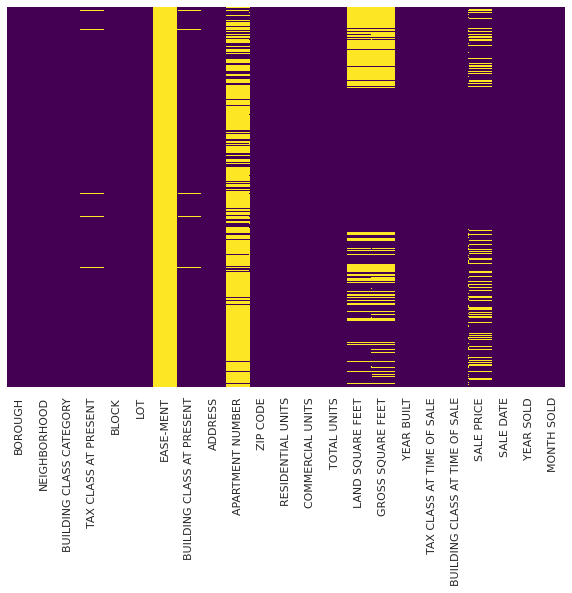

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#the heatmap shows that for "ease-ment" and "apartment numbers", there are a lot of NA features, meaning we can drop/remove these features.

In [ ]:
round(df.isna().sum() /len(df) *100,2)
#Over 30% of the data for Gross Square Feet and Land Square Feet are missing

BOROUGH                             0.00
NEIGHBORHOOD                        0.00
BUILDING CLASS CATEGORY             0.00
TAX CLASS AT PRESENT                0.87
BLOCK                               0.00
LOT                                 0.00
EASE-MENT                         100.00
BUILDING CLASS AT PRESENT           0.87
ADDRESS                             0.00
APARTMENT NUMBER                   77.47
ZIP CODE                            0.00
RESIDENTIAL UNITS                   0.00
COMMERCIAL UNITS                    0.00
TOTAL UNITS                         0.00
LAND SQUARE FEET                   31.05
GROSS SQUARE FEET                  32.66
YEAR BUILT                          0.00
TAX CLASS AT TIME OF SALE           0.00
BUILDING CLASS AT TIME OF SALE      0.00
SALE PRICE                         17.22
SALE DATE                           0.00
YEAR SOLD                           0.00
MONTH SOLD                          0.00
dtype: float64

In [ ]:
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

In [ ]:
df=df.dropna()
#dropping all the NAs

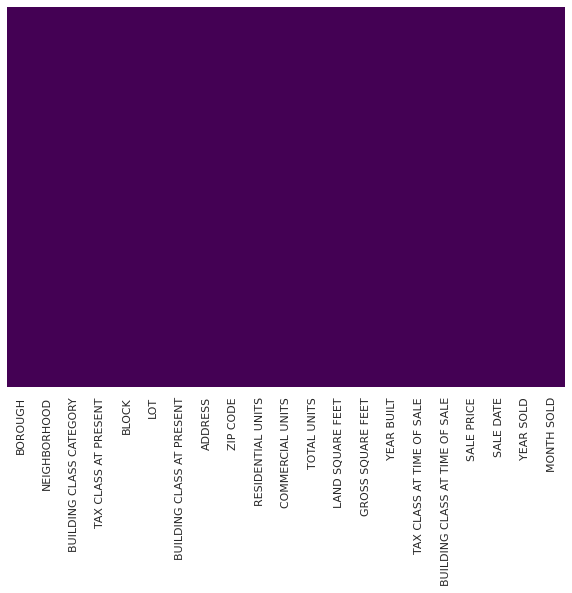

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sum(df.duplicated())
#seeing if there are any duplicated values

348

In [ ]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


**IDENTIFYING STRANGE DATA**

In [ ]:
temp =df.copy()
for cols in temp.columns:
    temp[cols]=pd.to_numeric(temp[cols], errors='coerce')

temp.info()
#creating temporary colums and using for loop to convert all the variables into numeric. Outputting an info command to look at the description

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47544 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47544 non-null  int64  
 1   NEIGHBORHOOD                    0 non-null      float64
 2   BUILDING CLASS CATEGORY         0 non-null      float64
 3   TAX CLASS AT PRESENT            42401 non-null  float64
 4   BLOCK                           47544 non-null  int64  
 5   LOT                             47544 non-null  int64  
 6   BUILDING CLASS AT PRESENT       0 non-null      float64
 7   ADDRESS                         0 non-null      float64
 8   ZIP CODE                        47544 non-null  int64  
 9   RESIDENTIAL UNITS               47544 non-null  int64  
 10  COMMERCIAL UNITS                47544 non-null  int64  
 11  TOTAL UNITS                     47544 non-null  int64  
 12  LAND SQUARE FEET                

In [ ]:
temp.describe().T
#describing temporary colums in tabeled format

,count,mean,std,min,25%,50%,75%,max
BOROUGH,47544.0,3.256836e+00,9.049520e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
NEIGHBORHOOD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,42401.0,1.428646e+00,8.524710e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
BLOCK,47544.0,4.993789e+03,3.431769e+03,1.000000e+00,2.218000e+03,4.666000e+03,6.983750e+03,1.631900e+04
LOT,47544.0,2.278511e+02,4.906937e+02,1.000000e+00,2.100000e+01,4.500000e+01,9.000000e+01,9.009000e+03
BUILDING CLASS AT PRESENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,47544.0,1.098669e+04,8.016274e+02,0.000000e+00,1.047000e+04,1.121700e+04,1.123800e+04,1.169400e+04
RESIDENTIAL UNITS,47544.0,2.553656e+00,1.723198e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.844000e+03


*Looking at the info table, there are three variables where the minimum values are zero, including sale price, year built, and total units. These variables having a value of zero does not make sense, since we would assume there would be a numeric number for continuous features such as sale price, year built, and total units. To look at these target variables, we will perform data visualization*

**DATA VISUALIZATION**

Looking at Sale Price:

In [ ]:
#creating a command to show how many sale prices are less than $10,000 or greater than $10,000,000

df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)

0.24310112737674575

24.31% of the sale prices are less than $10,000 or greater than 10,000,000, which is around a quarter of the data for this target feature. Because of this, we will trim the data to drop all these observations from the data and set a maximum value of Sale Price to be 4,000,000 

In [ ]:
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()

#looking at data for Sale Price where the values or greater than 10,000 and less than 10,000,000

count    3.592500e+04
mean     8.781402e+05
std      1.033943e+06
min      1.000100e+04
25%      4.000000e+05
50%      6.100000e+05
75%      9.418810e+05
max      9.999999e+06
Name: SALE PRICE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


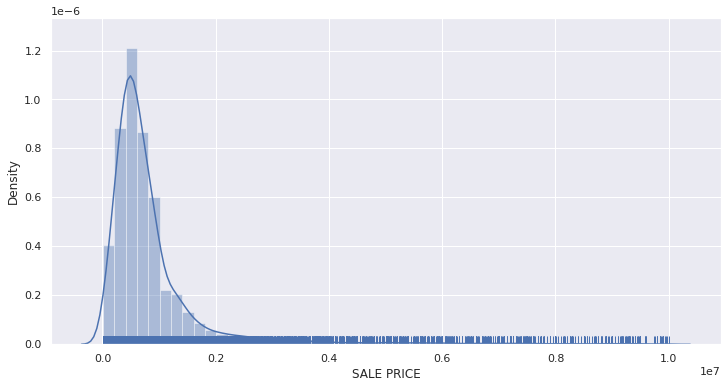

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()
#showing above data in a histogram

This plot shows that the data for Sale Price is right skewed, meaning that the data set's lower bound's are low relative to the rest of the data. To counter this, and make the histogram a little better, we will set a maximum value for Sale Price.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


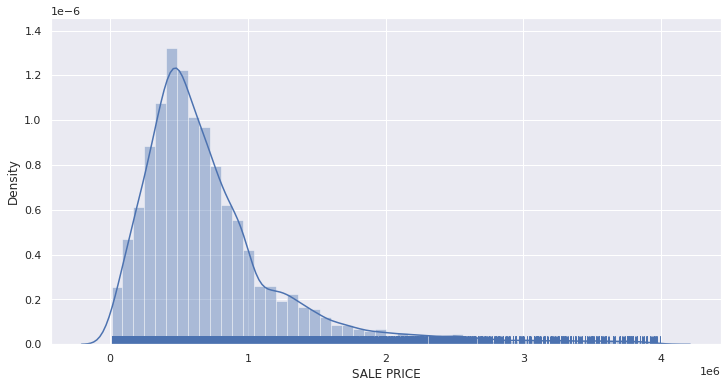

In [ ]:
df2= df2[(df2['SALE PRICE']<4000000)]
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

Now we will focus on target variable Year Built

Year Built:

In [ ]:
#counting how many data points we have for Year Built
df2[df2['YEAR BUILT']==0]['YEAR BUILT'].count()

1434

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


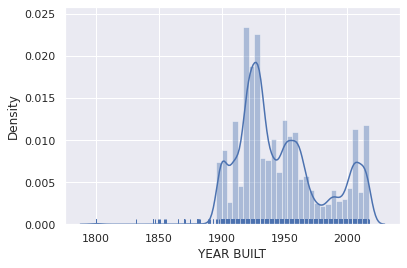

In [ ]:
#Using the !=0 command we can set the year to not-equal 0
##Plotting distribution
df3=df2[df2['YEAR BUILT']!=0].copy()
sns.distplot(df3['YEAR BUILT'], bins=50, rug=True)
plt.show()

Looking at this graph, we can see that most of the property sales increased during 1900 to around 1930. After around that year, property sales began to decrese, with small peaks increasing during 1950 and in the early 2000s.

Looking at Total Units

In [ ]:
#counting the number of values in the data for Total Units
df3[df3['TOTAL UNITS']==0]['TOTAL UNITS'].count()

3426

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


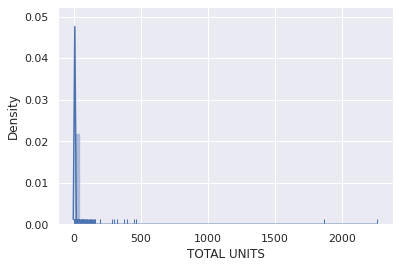

In [ ]:
#creating a new data fram (df4) to look at values where Total Units does not equl 0
df4=df3[df3['TOTAL UNITS']!=0].copy()
sns.distplot(df4['TOTAL UNITS'], bins=50, rug=True)
plt.show()


In [ ]:
df4.describe().T
#now the total units minimum is 1

,count,mean,std,min,25%,50%,75%,max
BLOCK,30236.0,5418.821835,3753.775464,1.0,2395.0,4836.0,7677.0,16319.0
LOT,30236.0,185.704987,384.518819,1.0,22.0,44.0,83.0,3597.0
RESIDENTIAL UNITS,30236.0,1.970532,12.586963,0.0,1.0,1.0,2.0,1844.0
COMMERCIAL UNITS,30236.0,0.173039,13.034598,0.0,0.0,0.0,0.0,2261.0
TOTAL UNITS,30236.0,2.147804,18.198705,1.0,1.0,1.0,2.0,2261.0
LAND SQUARE FEET,30236.0,3133.582088,27966.319284,0.0,1816.5,2417.0,3500.0,4228300.0
GROSS SQUARE FEET,30236.0,2440.363276,23800.244758,0.0,1208.0,1680.0,2392.0,3750565.0
SALE PRICE,30236.0,793820.011146,594725.186839,10001.0,436000.0,630000.0,940000.0,3995000.0


**Finalizing the Data Set**

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30236 entries, 3 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BLOCK                           30236 non-null  int64         
 5   LOT                             30236 non-null  int64         
 6   BUILDING CLASS AT PRESENT       30236 non-null  category      
 7   ADDRESS                         30236 non-null  object        
 8   ZIP CODE                        30236 non-null  category      
 9   RESIDENTIAL UNITS               30236 non-null  int64         
 10  COMMERCIAL UNITS                30236 non-null  int64         
 11  TO

In [ ]:
#dropping block, address, and lot
df4.drop(['BLOCK','LOT','ADDRESS'], axis=1, inplace=True)

In [ ]:
#Looking at borough, we want to change the numbers to print out the names of the boroughs
df4['BOROUGH']= df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [ ]:
#checking our work on the names of boroughs
df4.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR SOLD,MONTH SOLD
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
222,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


**Analysis**

In [ ]:
df_bar =df4[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
df_bar

,BOROUGH,SALE PRICE
0,Staten Island,5.257797e+05
1,Bronx,5.581147e+05
2,Queens,7.079732e+05
3,Brooklyn,1.039752e+06
4,Manhattan,1.846523e+06


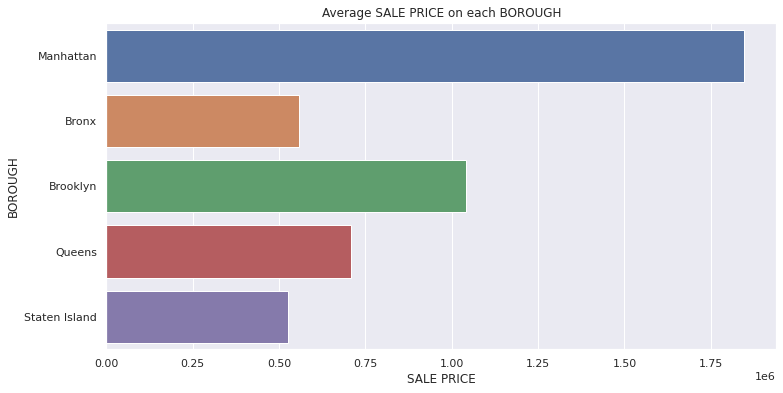

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_bar )
plt.title('Average SALE PRICE on each BOROUGH')
plt.show()

Looking at this table listing out the sale prices for each borough, the borough with the lowest sale price is Staten Island, while the borough with the highest sale price is Manhattan. This does make sense as Manhatten has a limited amount of space that is already being taken up by many skyscrappers. Because it is a bigger city, with a high density of buildings, the price of the property would sell for higher, due to land scarcity. Staten Island has the lowest sale price when comparing to the other boroughs, which may be due to Staten Island being a more suburban area instead of a more urban area

In [ ]:
#Looking at the number of property sales each month
df4['MONTH SOLD']= df4['MONTH SOLD'].map({1:'January', 2:'February', 3: 'March', 4:'April',5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December' })
df_bar=df4[['MONTH SOLD', 'SALE PRICE']].groupby(by='MONTH SOLD').count().sort_values(by='MONTH SOLD', ascending=True).reset_index()
df_bar.columns.values[1]='SALES COUNT'
df_bar

,MONTH SOLD,SALES COUNT
0,January,2432
1,February,2323
2,March,2782
3,April,2344
4,May,2565
5,June,2931
6,July,2328
7,August,1937
8,September,2807
9,October,2373


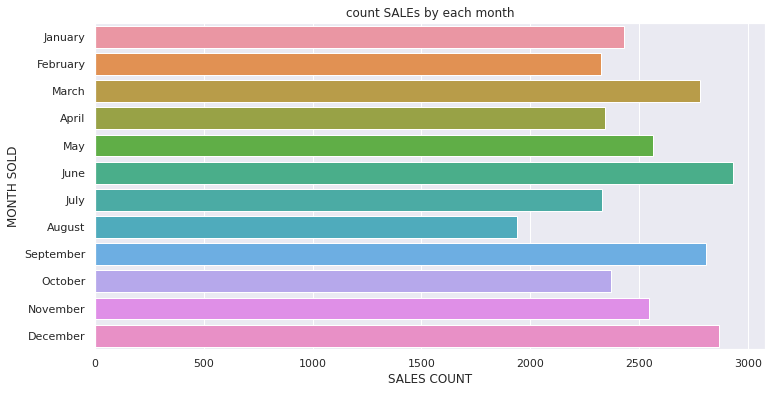

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'MONTH SOLD', x = 'SALES COUNT', data = df_bar )
plt.title('count SALEs by each month')
plt.show()

Looking at these two graphs, we can see that the amount of properties sold is highest in June. The other months were properties sold are relatively high are April, September,October, and December. August is the month with the lowest properties sold. It seems that at the end of every quarter (March, June, September, December), property sales increase.